[PIL ImageDraw (rectangle)](https://pillow.readthedocs.io/en/5.1.x/reference/ImageDraw.html) <br>

In [1]:
%matplotlib inline

import IPython.display as ip_display
import os
import sys
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import skimage
from skimage.filters import threshold_otsu

import openslide

import PIL
from PIL.Image import Image

import sys
sys.path.insert(0, '../src/python')
from openslide_2_tfrecord_module import *


file_ext_list = ['.svs', '.tif', '.tiff']
def get_file_size_dict(data_dir, reverse_dict=False):
    """ Usage:
    file_size_dict = get_file_size_dict(data_dir)
    """
    file_size_dict = {}
    for f in os.listdir(data_dir):
        ff = os.path.join(data_dir, f)
        if os.path.isfile(ff): 
            _, f_ext = os.path.splitext(ff)
            if f_ext in file_ext_list:
                file_size_dict[ff] = os.path.getsize(ff)
                
    return file_size_dict


data_dir = '../../DigiPath_MLTK_data/Aperio'

file_size_dict = get_file_size_dict(data_dir)
rev_file_size_dict = {v:k for k, v in file_size_dict.items()}

ordered_keys = sorted(list(file_size_dict.values()))
files_list = []
for k in ordered_keys:
    files_list.append(rev_file_size_dict[k])

print('\nordered by size:\n')
count = 0
for f in files_list:
    _, f_only = os.path.split(f)
    print('%3i %30s: %i'%(count, f_only, file_size_dict[f]))
    count += 1


ordered by size:

  0         CMU-1-Small-Region.svs: 1938955
  1               JP2K-33003-1.svs: 63847265
  2           CMU-1-JP2K-33005.svs: 132565343
  3                      CMU-1.svs: 177552579
  4                      CMU-3.svs: 253815723
  5               JP2K-33003-2.svs: 289250433
  6                      CMU-2.svs: 390750635


Opening Image file: 
	../../DigiPath_MLTK_data/Aperio/JP2K-33003-1.svs

openslide.OpenSlide(test_file_name) is type: <class 'openslide.OpenSlide'>
obj.level_count 3
obj.dimensions (15374, 17497)
obj.level_dimensions ((15374, 17497), (3843, 4374), (1921, 2187))
obj.level_downsamples (1.0, 4.000374525217675, 8.001790310306966)
obj.properties are type <class 'openslide._PropertyMap'>

obj.associated_images <_AssociatedImageMap {'label': <PIL.Image.Image image mode=RGBA size=415x422 at 0x1102EDF98>, 'macro': <PIL.Image.Image image mode=RGBA size=1280x421 at 0x12E2ED9B0>, 'thumbnail': <PIL.Image.Image image mode=RGBA size=674x768 at 0x12EE60048>}> <class 'openslide._AssociatedImageMap'>

obj.read_region <PIL.Image.Image image mode=RGBA size=200x200 at 0x11B6D5438>

obj.get_best_level_for_downsample(8.001790) 2

Fillable property names
	PROPERTY_NAME_COMMENT
	PROPERTY_NAME_MPP_X
	PROPERTY_NAME_MPP_Y
	PROPERTY_NAME_OBJECTIVE_POWER
Slide thumbnail <class 'PIL.Image.Image'>


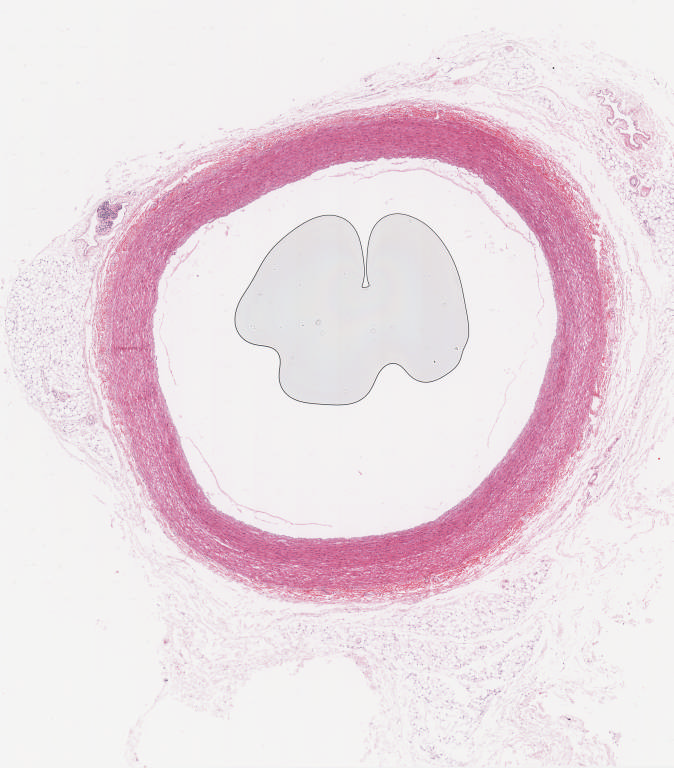


openslide_obj.close() returns: None
cell run time: 0.378


In [2]:
cell_start_time = time.time()

test_file_name = os.path.join(data_dir, 'JP2K-33003-1.svs')


print('Opening Image file: \n\t{}\n'.format(test_file_name))
openslide_obj = openslide.OpenSlide(test_file_name)

print('openslide.OpenSlide(test_file_name) is type:', type(openslide_obj))
print('obj.level_count', openslide_obj.level_count)
print('obj.dimensions', openslide_obj.dimensions)
print('obj.level_dimensions', openslide_obj.level_dimensions)
print('obj.level_downsamples', openslide_obj.level_downsamples)
print('obj.properties are type', type(openslide_obj.properties))

print('\nobj.associated_images', openslide_obj.associated_images, type(openslide_obj.associated_images))

blind_region = openslide_obj.read_region((0, 0), 0, (200,200))
print('\nobj.read_region', openslide_obj.read_region((0, 0), 0, (200,200)))

scldwn = openslide_obj.level_downsamples[-1]
print('\nobj.get_best_level_for_downsample(%0.6f)'%(scldwn), 
      openslide_obj.get_best_level_for_downsample(scldwn))

print('\nFillable property names\n\t{}\n\t{}\n\t{}\n\t{}'.format('PROPERTY_NAME_COMMENT',
                                                                 'PROPERTY_NAME_MPP_X', 
                                                                 'PROPERTY_NAME_MPP_Y', 
                                                                 'PROPERTY_NAME_OBJECTIVE_POWER'))
# label = openslide_obj.associated_images['label']
# macro = openslide_obj.associated_images['macro']
thumbnail = openslide_obj.associated_images['thumbnail']
# print('Slide Label')
# display(label)
print('Slide thumbnail', type(thumbnail))
display(thumbnail)

print('\nopenslide_obj.close() returns:', openslide_obj.close())
print('cell run time: %0.3f'%(time.time() - cell_start_time))

[StackOverflow draw rectangle](https://stackoverflow.com/questions/41405632/draw-a-rectangle-and-a-text-in-it-using-pil) <br>

```python
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

source_img = Image.open(file_name).convert("RGBA")

draw = ImageDraw.Draw(source_img)
draw.rectangle(((0, 0), (100, 100)), fill="black")
draw.text((20, 70), "something123", font=ImageFont.truetype("font_path123")) # font truetype ?? DNE

source_img.save(out_file, "JPEG")
```
[StackOverflow composite](https://stackoverflow.com/questions/2563822/how-do-you-composite-an-image-onto-another-image-with-pil-in-python) <br>
```python
from PIL import Image
img = Image.open('/path/to/file', 'r')
img_w, img_h = img.size
background = Image.new('RGBA', (1440, 900), (255, 255, 255, 255))
bg_w, bg_h = background.size
offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
background.paste(img, offset)
background.save('out.png')
```

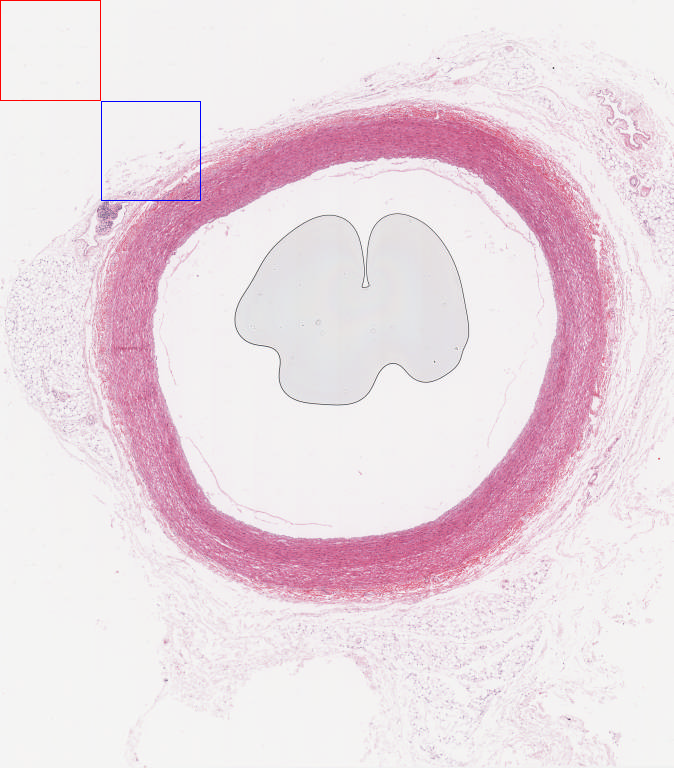

In [3]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

mtim = thumbnail.convert('RGBA')
draw = ImageDraw.Draw(mtim)
draw.rectangle(((0, 0), (100, 100)), outline='red', fill=None)
draw.rectangle(((101, 101), (200, 200)), outline='blue', fill=None)
# draw.text((20, 70), "something123", font=ImageFont.truetype("font_path123"))
display(mtim)

In [4]:
"""
                Givin a WSI and a TFRecord generate a masked thumbnail
                      gray background - patches not included
                      color_forground - patches included
                      black border    - patch boundry -- info not saved in previous version
"""
def generate_masked_thumbnail(tfrecord_filename, wsi_filename):
    """  """
    masked_thumbnail = None
    patch_height = 224
    patch_width = 224
    # open the TFRecord - get the iterator
    #       find the patch size from the image names
    #       
    # open the WSI - get FSI size & get thumbnail, make a grayscale copy as "RGBA" & calculate scale
    os_obj = openslide.OpenSlide(wsi_filename)
    mask_dict = get_mask_w_scale_grid(os_obj, patch_height, patch_width)
    
    one_thumb = mask_dict['one_thumb']
    grey_thumb = one_thumb.convert('L')
    grey_thumb = grey_thumb.convert('RGB')

    
    # for each patch 
    #   get the location 
    #   get the scaled thumb location
    #   copy the color thumb location into the grayscale
    # return converted RGBA grayscale as RGB
    
    return mask_dict

tfrecord_filename = 'bobo'
test_file_name = os.path.join(data_dir, 'JP2K-33003-1.svs')

mskdct = generate_masked_thumbnail(tfrecord_filename, test_file_name)
one_thumb = mskdct['one_thumb']
grey_thumb = one_thumb.convert('L')
grey_thumb = grey_thumb.convert('RGBA')
for k in mskdct.keys():
    print(k)

one_thumb
thumb_mask
full_scale_rows_dict
full_scale_cols_dict
full_scale_rows_arrays
full_scale_cols_arrays
thumb_scale_rows_arrays
thumb_scale_cols_arrays


type(smaller_box):	 <class 'PIL.Image.Image'>


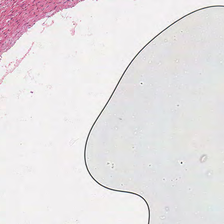

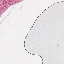

(64, 64)

In [8]:
# draw.rectangle(((101, 101), (200, 200)), outline='blue', fill=None)
# left, upper, right, lower
lft = 250
uppr = 300
rght = lft+224
lwr = uppr+224
box = (lft,uppr,rght,lwr)
sm_box = one_thumb.crop(box)
smaller_box = sm_box.resize((64,64))
print('type(smaller_box):\t',type(smaller_box))
display(sm_box)
display(smaller_box)
smaller_box.size

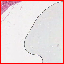

In [10]:

mtim = smaller_box.convert('RGBA')
draw = ImageDraw.Draw(mtim)
h = mtim.size[0]
w = mtim.size[1]

draw.rectangle(((0, 0), (h-1, w-1)), outline='red', fill=None)
mtim.convert('RGB')
display(mtim)

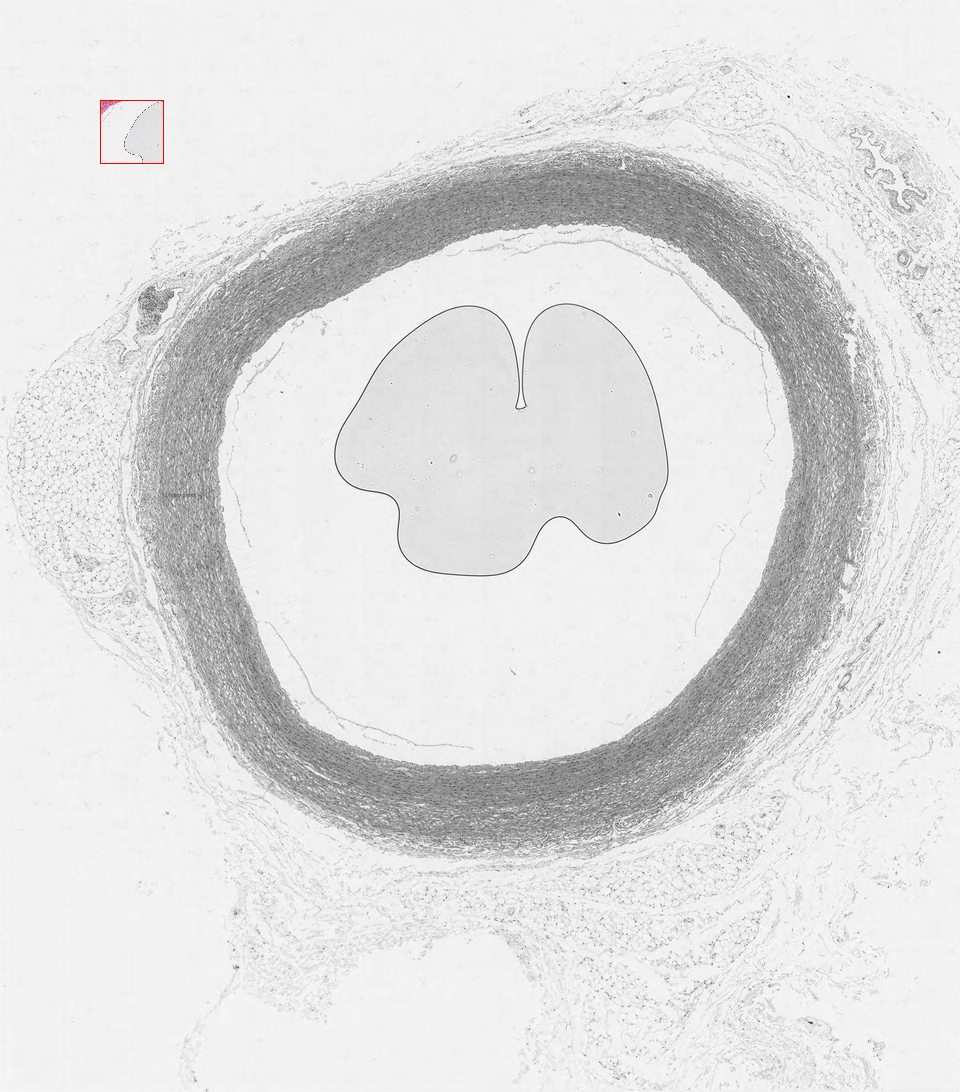

In [11]:
offset = (100,100)
grey_thumb.paste(mtim, offset)
display(grey_thumb)